### 9 Exercises 

##### 9.1 

☼ Can you come up with grammatical sentences that have probably never been uttered before? (Take turns with a partner.) What does this tell you about human language?

*I'm not doing this with a partner, but I believe that this here answer to exercise 9.1 in the NLTK book consists of a particular sequence of words that has never, in the entire history of humankind, been written - or for that matter, uttered - before, and would thus qualify as a satisfactory answer to this exercise.*

*Naturally, the longer and more specific a sentence, the less likely that it's ever been uttered.  Simply put, this tells us that human language is capable of infinite variety, and any attempts to come up with a grammar for human language need to take this into account.*

##### 9.2 

☼ Recall Strunk and White's prohibition against sentence-initial *however* used to mean "although". Do a web search for however used at the start of the sentence. How widely used is this construction?

*It's not possible to do a Google search and specify where in the returned sentences a keyword should fall.  In fact, none of the queryable corpora that I have seen offer this functionality.  However, searches of the [Corpus of Contemporary American English](https://www.english-corpora.org/coca/ "coca") will show the results in context, and from skimming this results it is easy to see that "however" is commonly used at the beginning of sentences, and in some very erudite contexts.*

##### 9.3 

☼ Consider the sentence *Kim arrived or Dana left and everyone cheered*. Write down the parenthesized forms to show the relative scope of and and or. Generate tree structures corresponding to both of these interpretations.

(S (S (S (NP (N Kim)) (VP (V arrived))) (CC or) (S (NP (N Dana)) (VP (V left)))) (CC and) (S (NP (N everyone)) (VP (V cheered))))
    

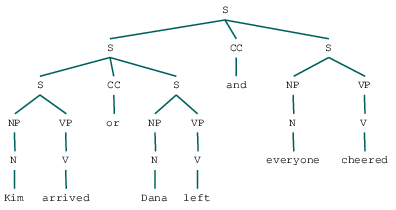

In [2]:
import nltk
from nltk import Tree

string = "(S (S (S (NP (N Kim)) (VP (V arrived))) (CC or) (S (NP (N Dana)) (VP (V left)))) (CC and) (S (NP (N everyone)) (VP (V cheered))))"
nltk.Tree.fromstring(string)

*Since "Kim arrived", "Dana left" and "everyone cheered" all contain noun and verb phrases, each could be considered a sentence in the grammars from this chapter.  Furthermore, "or" joins the first two sentences into another sentence, since we're not sure which action prompted everyone to cheer.*

##### 9.4 

☼ The `Tree` class implements a variety of other useful methods. See the `Tree` help documentation for more details, i.e. import the Tree class and then type `help(Tree)`.

In [2]:
from nltk import Tree

help(Tree)

Help on class Tree in module nltk.tree:

class Tree(builtins.list)
 |  Tree(node, children=None)
 |  
 |  A Tree represents a hierarchical grouping of leaves and subtrees.
 |  For example, each constituent in a syntax tree is represented by a single Tree.
 |  
 |  A tree's children are encoded as a list of leaves and subtrees,
 |  where a leaf is a basic (non-tree) value; and a subtree is a
 |  nested Tree.
 |  
 |      >>> from nltk.tree import Tree
 |      >>> print(Tree(1, [2, Tree(3, [4]), 5]))
 |      (1 2 (3 4) 5)
 |      >>> vp = Tree('VP', [Tree('V', ['saw']),
 |      ...                  Tree('NP', ['him'])])
 |      >>> s = Tree('S', [Tree('NP', ['I']), vp])
 |      >>> print(s)
 |      (S (NP I) (VP (V saw) (NP him)))
 |      >>> print(s[1])
 |      (VP (V saw) (NP him))
 |      >>> print(s[1,1])
 |      (NP him)
 |      >>> t = Tree.fromstring("(S (NP I) (VP (V saw) (NP him)))")
 |      >>> s == t
 |      True
 |      >>> t[1][1].set_label('X')
 |      >>> t[1][1].label()
 

##### 9.5 

☼ In this exercise you will manually construct some parse trees.

* a. Write code to produce two trees, one for each reading of the phrase *old men and women*

* b. Encode any of the trees presented in this chapter as a labeled bracketing and use `nltk.Tree()` to check that it is well-formed. Now use `draw()` to display the tree.

* c. As in (a) above, draw a tree for *The woman saw a man last Thursday.*

*a.*

In [3]:
grammar = nltk.CFG.fromstring("""

S -> NP CC NP | JJ NP
NP -> N | JJ N | N CC N
N -> 'men' | 'women'
JJ -> 'old'
CC -> 'and'
""")

In [4]:
sent = ['old', 'men', 'and', 'women']
parser = nltk.ChartParser(grammar)
for tree in parser.parse(sent):
    print(tree)

(S (JJ old) (NP (N men) (CC and) (N women)))
(S (NP (JJ old) (N men)) (CC and) (NP (N women)))


In [5]:
trees = []
for tree in parser.parse(sent):
    trees.append(str(tree))

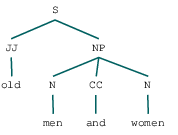

In [6]:
nltk.Tree.fromstring(trees[0])

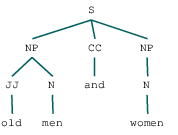

In [7]:
nltk.Tree.fromstring(trees[1])

*It doesn't appear we can draw multiple trees at once.  The following code produces nothing:*

In [8]:
for t in trees:
    nltk.Tree.fromstring(t)

*b.*

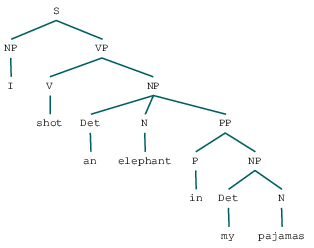

In [9]:
groucho = "(S (NP I) (VP (V shot) (NP (Det an) (N elephant) (PP (P in)\
            (NP (Det my) (N pajamas))))))"
nltk.Tree.fromstring(groucho)

*c.*

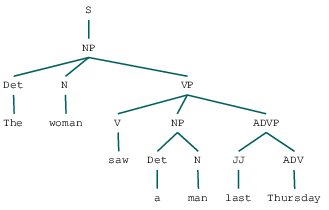

In [10]:
string = "(S (NP (Det The) (N woman) (VP (V saw) (NP (Det a) (N man))\
           (ADVP (JJ last) (ADV Thursday)))))"
nltk.Tree.fromstring(string)

##### 6.

☼ Write a recursive function to traverse a tree and return the depth of the tree, such that a tree with a single node would have depth zero. (Hint: the depth of a subtree is the maximum depth of its children, plus one.)

*Not sure about this, but I can't find a better implementation...*

In [87]:
def find_depth(tree):
    if isinstance(tree, nltk.Tree):
        for subtree in tree:
            return 1 + find_depth(subtree)
    else:
        return 0

In [88]:
from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
find_depth(t)

4

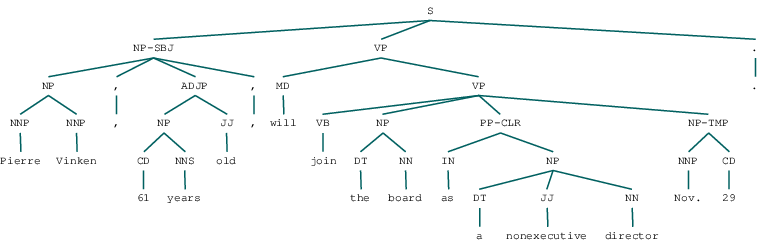

In [77]:
nltk.Tree.fromstring(str(t))

In [84]:
t = nltk.Tree.fromstring('(S (NP Alice) (VP chased (NP the rabbit)))')
find_depth(t)

2

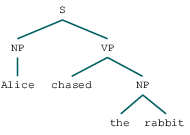

In [79]:
nltk.Tree.fromstring(str(t))

##### 7.

☼ Analyze the A.A. Milne sentence about Piglet, by underlining all of the sentences it contains then replacing these with `S`. Draw a tree structure for this "compressed" sentence. What are the main syntactic constructions used for building such a long sentence?

*It would be a lot of work to convert this sentence into a tree, so for the sake of simplicity I'm just going to bold those phrases which could be replaced with `S`.  Bear in mind that there are a few nested sentences within these bold phrases, but for the sake of legibility I decided to leave these be.*

*"In after-years he liked to think that __he had been in Very Great Danger during the Terrible Flood__, but __the only danger he had really been in was the last half-hour of his imprisonment__, when __Owl, who had just flown up, sat on a branch of his tree to comfort him__, and __told him a very long story about an aunt who had once laid a seagull's egg by mistake__, and __the story went on and on__, rather like this sentence, until __Piglet who was listening out of his window without much hope, went to sleep quietly and naturally_, slipping slowly out of the window towards the water__ until __he was only hanging on by his toes__, at which moment, __luckily, a sudden loud squawk from Owl, which was really part of the story, being what his aunt said, woke the Piglet up__ and __just gave him time to jerk himself back into safety and say, "How interesting, and did she?"__ when — well, __you can imagine his joy when at last he saw the good ship, Brain of Pooh (Captain, C. Robin; 1st Mate, P. Bear) coming over the sea to rescue him__..."*

*The syntactic constructions used for building this sentence are conjuctions (__and__, __but__), adverbials of time (__when__, __until__, __at which moment__), and sentential verbs (__think__).*

##### 8. 

☼ In the recursive descent parser demo, experiment with changing the sentence to be parsed by selecting *Edit Text* in the *Edit* menu.

*As mentioned in the Jupyter notebook for the notes on this chapter, calling `nltk.app.rdparser()` opens it in a new window, which is not ideal when trying to save output in a Jupyter notebook.  So while I have done as instructed, I won't be calling the parser again from this notebook.*

##### 9. 

☼ Can the grammar in `grammar1` be used to describe sentences that are more than 20 words in length?

*Yes, but the resulting sentence would be ridiculous, if not downright nonsensical.  Because `PP`s can be part of `NP`s and `NP`s can be part of `PP`s, we can build a `NP` out of a chain of `PP`s that will go on as long as we'd like it.*

In [91]:
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)

In [100]:
sent = "a dog in the park by the cat with the telescope on the dog ate the man in the park by the cat with the telescope".split()
rd_parser = nltk.RecursiveDescentParser(grammar1)
for tree in rd_parser.parse(sent):
    print(tree)

(S
  (NP
    (Det a)
    (N dog)
    (PP
      (P in)
      (NP
        (Det the)
        (N park)
        (PP
          (P by)
          (NP
            (Det the)
            (N cat)
            (PP
              (P with)
              (NP
                (Det the)
                (N telescope)
                (PP (P on) (NP (Det the) (N dog))))))))))
  (VP
    (V ate)
    (NP
      (Det the)
      (N man)
      (PP
        (P in)
        (NP
          (Det the)
          (N park)
          (PP
            (P by)
            (NP
              (Det the)
              (N cat)
              (PP (P with) (NP (Det the) (N telescope))))))))))
(S
  (NP
    (Det a)
    (N dog)
    (PP
      (P in)
      (NP
        (Det the)
        (N park)
        (PP
          (P by)
          (NP
            (Det the)
            (N cat)
            (PP
              (P with)
              (NP
                (Det the)
                (N telescope)
                (PP (P on) (NP (Det the) (N dog))))))))))

In [101]:
len(sent)

26

##### 10. 

☼ Use the graphical chart-parser interface to experiment with different rule invocation strategies. Come up with your own strategy that you can execute manually using the graphical interface. Describe the steps, and report any efficiency improvements it has (e.g. in terms of the size of the resulting chart). Do these improvements depend on the structure of the grammar? What do you think of the prospects for significant performance boosts from cleverer rule invocation strategies?

*As was the case with the other apps, calling `nltk.app.chartparser()` will the app to open in a new window, so I won't be calling it from this notebook.*

*Unfortunately, there's no tally on the app showing how many steps were needed to find the parses, so it's a little difficult to do a side-by-side comparison.  Here's what I found using the different rules:*

__Top Down Init Rule__: did not produce a result

__Top Down Predict Rule__: did not produce a result

__Bottom Up Predict Rule__: very quick, but only produced one parse when the grammar makes two possible

__Bottom Up Left-Corner Predict Rule__: also very quick, but failed on one parse

__Fundamental Rule__: no result

__Top Down Strategy__: slow, but generated two parses

__Bottom Up Strategy__: slow, but generated two parses

__Bottom Up Left-Corner Strategy__: slow, but quicker than previous two

*The only "strategy" I came up with was to use the quickest one that produced the correct number of parses, which here was the __Bottom Up Left-Corner Strategy__. I'm not in the mood now to try all of the possible variations of strategies, so I'm going to leave this part of the question unanswered. However, it's hard to think that the structure of the grammar wouldn't have an effect on the efficiency of the parser, since grammars that allow for more than one possible parses are going to require more steps than grammars that only allow one possible parse.*

##### 11.

☼ With pen and paper, manually trace the execution of a recursive descent parser and a shift-reduce parser, for a CFG you have already seen, or one of your own devising.

*Obviously, I'm not going to reproduce this in a markdown cell.  Since this is a lot of work, I used the very simple grammar at the beginning of the chapter for the Groucho Marx quote.  One thing I wondered about both parsers was how they go back to look for alternative parses after they have found a successful one.

##### 12.

☼ We have seen that a chart parser adds but never removes edges from a chart. Why?

*It's difficult to find a definitive answer, but it appears that since nodes may be used again in a different grammar production, it would be unwise to remove them.*

##### 13.

☼ Consider the sequence of words: *Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo*. This is a grammatically correct sentence, as explained on [this wikipedia page](http://en.wikipedia.org/wiki/Buffalo_buffalo_Buffalo_buffalo_buffalo_buffalo_Buffalo_buffalo "buffalo ..."). Consider the tree diagram presented on this Wikipedia page, and write down a suitable grammar. Normalize case to lowercase, to simulate the problem that a listener has when hearing this sentence. Can you find other parses for this sentence? How does the number of parse trees grow as the sentence gets longer? (More examples of these sentences can be found [here](http://en.wikipedia.org/wiki/List_of_homophonous_phrases "more humorous phrases").)


*Here is a simple grammar based on the parse on the Wikipedia page:*



In [117]:
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  NP -> NP RC | PN N
  RC -> NP V
  VP -> V NP 
  V -> "buffalo"
  N -> "buffalo"
  PN -> "Buffalo"
  """)

sent = "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo".split()
cp_parser = nltk.ChartParser(grammar1)
for tree in cp_parser.parse(sent):
    print(tree)

(S
  (NP
    (NP (PN Buffalo) (N buffalo))
    (RC (NP (PN Buffalo) (N buffalo)) (V buffalo)))
  (VP (V buffalo) (NP (PN Buffalo) (N buffalo))))


*If we convert all occurrences of 'buffalo' to lowercase, there are two possible parses in this grammar.*

In [132]:
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  NP -> NP RC | PN N
  RC -> NP V
  VP -> V NP 
  V -> "buffalo"
  N -> "buffalo"
  PN -> "buffalo"
  """)

sent = ["buffalo"] * 8
cp_parser = nltk.ChartParser(grammar1)

for tree in cp_parser.parse(sent):
    print(tree)
    

(S
  (NP
    (NP (PN buffalo) (N buffalo))
    (RC (NP (PN buffalo) (N buffalo)) (V buffalo)))
  (VP (V buffalo) (NP (PN buffalo) (N buffalo))))
(S
  (NP (PN buffalo) (N buffalo))
  (VP
    (V buffalo)
    (NP
      (NP (PN buffalo) (N buffalo))
      (RC (NP (PN buffalo) (N buffalo)) (V buffalo)))))


*If we increase the length of the sentence by intervals of 3, the number of possible parses follows the same pattern as the Catalan numbers.  For sentences with lengths between those intervals (e.g., 9, 10, 12, 13, 15, 16, etc...), the number of possible parses is 0.  For a sentence with more than 29 words, the code below takes a considerable amount of time to run.*

In [135]:
[sum([1 for tree in cp_parser.parse(["buffalo"] * i)]) for i in range(8, 30, 3)]

[2, 5, 14, 42, 132, 429, 1430, 4862]

##### 14. 

◑ You can modify the grammar in the recursive descent parser demo by selecting *Edit Grammar* in the *Edit* menu. Change the second expansion production, namely `NP -> Det N PP`, to `NP -> NP PP`. Using the *Step* button, try to build a parse tree. What happens?

*The parser will try to recursively expand `NP` to `NP PP` __ad infinitum__.*

##### 15.

◑ Extend the grammar in `grammar2` with productions that expand prepositions as intransitive, transitive and requiring a `PP` complement. Based on these productions, use the method of the preceding exercise to draw a tree for the sentence *Lee ran away home*.

*Adjectives can't be transitive or intransitive.  Transitivity is a property of verbs.  The authors of this book has Ph.D's in Computational Linguistics, so surely they know this.  What they probably lack are qualifications in proofreading, as this is what must surely be another example of an error in this book.  Likewise, the preceding exercise has nothing to do with trees.*

*Creating a very simplified grammar for this exercise:*

In [140]:
grammar2 = nltk.CFG.fromstring("""
  S  -> NP VP
  NP -> PropN | Det N
  VP -> TV NP | V PP | IV
  PP -> P Comp
  PropN -> 'Lee'
  Det -> 'the' | 'a'
  N -> 'bear' | 'squirrel' | 'tree' | 'fish' | 'log'
  TV -> 'ate'
  IV -> 'smiled'
  V ->  'ran'
  P -> 'away'
  Comp -> 'home'
  """)

In [141]:
rd_parser = nltk.RecursiveDescentParser(grammar2)
sent = 'Lee ran away home'.split()
for tree in rd_parser.parse(sent):
    print(tree)

(S (NP (PropN Lee)) (VP (V ran) (PP (P away) (Comp home))))


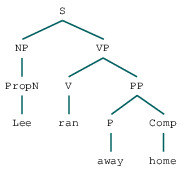

In [158]:
trees = []
for tree in rd_parser.parse(sent):
    trees.append(str(tree))

nltk.Tree.fromstring(trees[0])

##### 16. 

◑ Pick some common verbs and complete the following tasks:

* a. Write a program to find those verbs in the Prepositional Phrase Attachment Corpus `nltk.corpus.ppattach`. Find any cases where the same verb exhibits two different attachments, but where the first noun, or second noun, or preposition, stay unchanged (as we saw in our discussion of syntactic ambiguity in [2](https://www.nltk.org/book/ch08.html#sec-whats-the-use-of-syntax).

* b. Devise CFG grammar productions to cover some of these cases.

*The authors assume it's perfectly clear what they're asking for, but to me it's as clear as mud.  An example would help immensely.*




*This appears to be a step in the right direction:*

In [183]:
verbs = ["come", "get", "give", "go", "look", "take"]

from collections import defaultdict
entries = nltk.corpus.ppattach.attachments('training')
table = defaultdict(lambda: defaultdict(set))
for entry in entries:
    if entry.verb in verbs:
        key = entry.verb 
        # same noun1
        table[key][entry.noun1].add(entry.attachment)
        


In [187]:
table

defaultdict(<function __main__.<lambda>()>,
            {'give': defaultdict(set,
                         {'discounts': {'N'},
                          'way': {'V'},
                          'it': {'V'},
                          'particulars': {'N'},
                          'them': {'V'},
                          'questions': {'V'},
                          'scoop': {'N'},
                          'window': {'N'},
                          'duo': {'V'},
                          'rights': {'N'},
                          'control': {'N'},
                          'value': {'N'},
                          'leaders': {'N', 'V'},
                          'certainty': {'V'},
                          'NASA': {'V'},
                          'stake': {'N', 'V'},
                          'issue': {'N'},
                          'demand': {'N'},
                          'jurisdiction': {'N'},
                          'nod': {'V'},
                          'seat': {'N'},
      

In [190]:
for v in verbs:
    for key in sorted(table[v]):
        if len(table[v][key]) > 1:
            print(v, key, sorted(table[v][key]))

get feeling ['N', 'V']
get license ['N', 'V']
get number ['N', 'V']
get pound ['N', 'V']
get price ['N', 'V']
get sort ['N', 'V']
give answers ['N', 'V']
give assessment ['N', 'V']
give boost ['N', 'V']
give leaders ['N', 'V']
give lot ['N', 'V']
give part ['N', 'V']
give protection ['N', 'V']
give sets ['N', 'V']
give some ['N', 'V']
give stake ['N', 'V']
go hand ['N', 'V']
go way ['N', 'V']
take action ['N', 'V']
take applications ['N', 'V']
take charge ['N', 'V']
take charges ['N', 'V']
take control ['N', 'V']
take deduction ['N', 'V']
take effect ['N', 'V']
take look ['N', 'V']
take part ['N', 'V']
take role ['N', 'V']
take some ['N', 'V']
take write-offs ['N', 'V']
